In [1]:
!pip install tensorflow==2.16.2

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 3.2 MB/s eta 0:01:58
   ---------------------------------------- 0.1/377.0 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 0.2/377.0 MB 1.7 MB/s eta 0:03:45
   ---------------------------------------- 0.2/377.0 MB 1.6 MB/s eta 0:03:56
   ---------------------------------------- 0.2/377.0 MB 1.6 MB/s eta 0:03:56
   ---------------------------------------- 0.3/377.0 MB 1.3 MB/s eta 0:04:49
   ---------------------------------------- 0.4/377.0 MB 1.3 MB/s eta 0:04:40
   ---


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/292.2 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/292.2 kB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 215.0/292.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 292.2/292.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/242.4 kB ? eta -:--:--
   ----------------------- ---------------- 143.4/242.4 kB 8.3 MB/s eta 0:00:01
   -------------------------------------- - 235.5/242.4 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 242.4/242.4 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/87.5 kB ? eta -:--:--
   ---------------------------------------- 87.5/87.5 kB 5.2 MB/s eta 0:00:00


In [2]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [3]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3621 - val_loss: 0.1746
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1659 - val_loss: 0.1409
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1383 - val_loss: 0.1266
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1260 - val_loss: 0.1187
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1192 - val_loss: 0.1143
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1150 - val_loss: 0.1114
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1119 - val_loss: 0.1089
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1091 - val_loss: 0.1060
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1069 - val_loss: 0.1042
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1055 - val_loss: 0.1029
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1038 - val_loss: 0.1013
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [5]:
!pip install matplotlib==3.9.2

     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/168.5 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/168.5 kB 544.7 kB/s eta 0:00:01
     -------------------------- --------- 122.9/168.5 kB 804.6 kB/s eta 0:00:01
     ------------------------------------ 168.5/168.5 kB 846.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 6.8 MB/s eta 0:00:02
    --------------------------------------- 0.2/7.8 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.3/7.8 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/7.8 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.8 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/7.8 MB 2.4 MB/s eta 0:00:03
   --- -


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


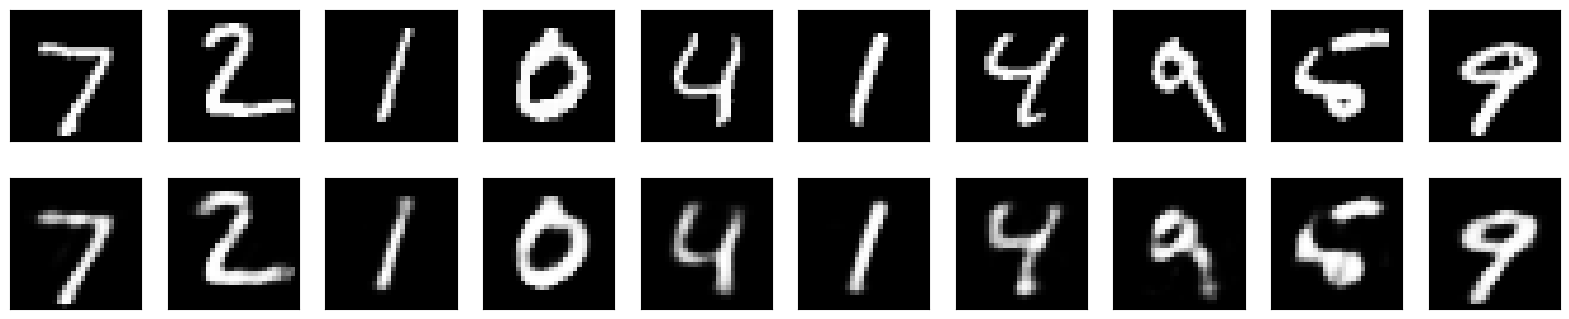

In [6]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


In [7]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0951 - val_loss: 0.0921
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0931 - val_loss: 0.0918
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0927 - val_loss: 0.0913
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0922 - val_loss: 0.0908
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0917 - val_loss: 0.0908
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0917 - val_loss: 0.0903
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0916 - val_loss: 0.0904
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0914 - val_loss: 0.0903


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2213 - val_loss: 0.1456
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1430 - val_loss: 0.1351
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1346 - val_loss: 0.1302
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1304 - val_loss: 0.1277
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1283 - val_loss: 0.1259
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1262 - val_loss: 0.1248
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1250 - val_loss: 0.1239
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1241 - val_loss: 0.1232
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1238 - val_loss: 0.1227
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1233 - val_loss: 0.1226
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1230 - val_loss: 0.1222
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

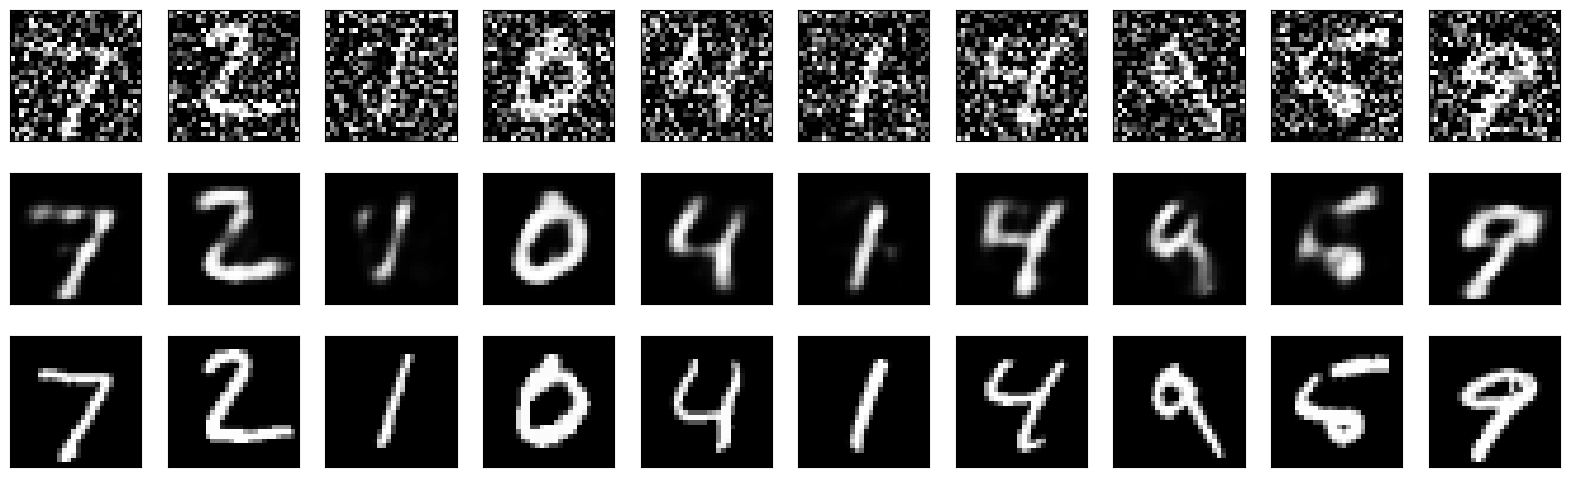

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
